In [4]:
import pandas as pd
from pathlib import Path
fold_path = Path("../datasets/")
stuff = pd.read_csv(fold_path/'coords.csv')
eval_set = stuff[stuff.pred.isna() == False]
eval_set

,image,latitude,longitude,pred
14,521324374_96290dd123_234_7132415@N03.jpg,45.516571,-122.674198,"45.5160, -122.6732"
43,323812702_56b1893e47_129_26519935@N00.jpg,22.255101,113.905992,"22.254024, 113.904983"
46,315248304_34cc3e6aea_103_49777280@N00.jpg,41.149383,-8.610105,"41.141979, -8.6117156"
75,1125007623_477d5426e9_1379_93455345@N00.jpg,37.331948,136.785278,"35.0344943, 135.71826339999998"
88,865326234_0c641c683c_1415_19953481@N00.jpg,49.779047,20.048675,"50.1684487, 23.0145855"
126,244563496_1439c608d0_90_40829484@N00.jpg,40.706018,-74.001760,"40.7131281, -74.0344231"
140,873010122_2c74adfa62_1015_9729483@N02.jpg,40.827461,-73.926744,"40.8296426, -73.9261745"
144,522503678_d890e18189_238_61819159@N00.jpg,-25.347283,131.055049,"-25.343715, 131.033678"


In [5]:
eval_set['pred_lat'] = eval_set.pred.apply(lambda x: float(x.split(',')[0]))
eval_set['pred_lon'] = eval_set.pred.apply(lambda x: float(x.split(',')[1]))
eval_set

/var/folders/z5/ks9fxjt91y1dgv38xzprh08m0000gn/T/ipykernel_12625/2682320412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eval_set['pred_lat'] = eval_set.pred.apply(lambda x: float(x.split(',')[0]))
/var/folders/z5/ks9fxjt91y1dgv38xzprh08m0000gn/T/ipykernel_12625/2682320412.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eval_set['pred_lon'] = eval_set.pred.apply(lambda x: float(x.split(',')[1]))


,image,latitude,longitude,pred,pred_lat,pred_lon
14,521324374_96290dd123_234_7132415@N03.jpg,45.516571,-122.674198,"45.5160, -122.6732",45.516000,-122.673200
43,323812702_56b1893e47_129_26519935@N00.jpg,22.255101,113.905992,"22.254024, 113.904983",22.254024,113.904983
46,315248304_34cc3e6aea_103_49777280@N00.jpg,41.149383,-8.610105,"41.141979, -8.6117156",41.141979,-8.611716
75,1125007623_477d5426e9_1379_93455345@N00.jpg,37.331948,136.785278,"35.0344943, 135.71826339999998",35.034494,135.718263
88,865326234_0c641c683c_1415_19953481@N00.jpg,49.779047,20.048675,"50.1684487, 23.0145855",50.168449,23.014585
126,244563496_1439c608d0_90_40829484@N00.jpg,40.706018,-74.001760,"40.7131281, -74.0344231",40.713128,-74.034423
140,873010122_2c74adfa62_1015_9729483@N02.jpg,40.827461,-73.926744,"40.8296426, -73.9261745",40.829643,-73.926175
144,522503678_d890e18189_238_61819159@N00.jpg,-25.347283,131.055049,"-25.343715, 131.033678",-25.343715,131.033678


In [6]:
from src.tools.geo_clip.inference import predict
from PIL import Image
from tqdm import tqdm
for i, row in tqdm(eval_set.iterrows()):
    geoclip_prediction = predict(Image.open(fold_path/row['image']), top_n=1)
    eval_set.at[i, 'geoclip_lat'] = geoclip_prediction[0][0][0]
    eval_set.at[i, 'geoclip_lon'] = geoclip_prediction[0][0][1]
eval_set

0it [00:00, ?it/s]`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
/var/folders/z5/ks9fxjt91y1dgv38xzprh08m0000gn/T/ipykernel_12625/1922697041.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy

,image,latitude,longitude,pred,pred_lat,pred_lon,geoclip_lat,geoclip_lon
14,521324374_96290dd123_234_7132415@N03.jpg,45.516571,-122.674198,"45.5160, -122.6732",45.516000,-122.673200,45.516883,-122.680968
43,323812702_56b1893e47_129_26519935@N00.jpg,22.255101,113.905992,"22.254024, 113.904983",22.254024,113.904983,22.254024,113.904983
46,315248304_34cc3e6aea_103_49777280@N00.jpg,41.149383,-8.610105,"41.141979, -8.6117156",41.141979,-8.611716,41.140540,-8.612304
75,1125007623_477d5426e9_1379_93455345@N00.jpg,37.331948,136.785278,"35.0344943, 135.71826339999998",35.034494,135.718263,34.685592,135.841140
88,865326234_0c641c683c_1415_19953481@N00.jpg,49.779047,20.048675,"50.1684487, 23.0145855",50.168449,23.014585,52.647125,23.667554
126,244563496_1439c608d0_90_40829484@N00.jpg,40.706018,-74.001760,"40.7131281, -74.0344231",40.713128,-74.034423,40.648703,-74.064910
140,873010122_2c74adfa62_1015_9729483@N02.jpg,40.827461,-73.926744,"40.8296426, -73.9261745",40.829643,-73.926175,40.829238,-73.927879
144,522503678_d890e18189_238_61819159@N00.jpg,-25.347283,131.055049,"-25.343715, 131.033678",-25.343715,131.033678,-25.343715,131.033678


In [7]:
from geographiclib.geodesic import Geodesic
geod = Geodesic.WGS84
eval_set['geoclip_dist'] = eval_set.apply(lambda x: geod.Inverse(x['geoclip_lat'], x['geoclip_lon'], x['latitude'], x['longitude'])['s12']/1000, axis=1)
eval_set['pred_dist'] = eval_set.apply(lambda x: geod.Inverse(x['latitude'], x['longitude'], x['pred_lat'], x['pred_lon'])['s12']/1000, axis=1)
eval_set[['geoclip_dist', 'pred_dist']]

/var/folders/z5/ks9fxjt91y1dgv38xzprh08m0000gn/T/ipykernel_12625/2594491122.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eval_set['geoclip_dist'] = eval_set.apply(lambda x: geod.Inverse(x['geoclip_lat'], x['geoclip_lon'], x['latitude'], x['longitude'])['s12']/1000, axis=1)
/var/folders/z5/ks9fxjt91y1dgv38xzprh08m0000gn/T/ipykernel_12625/2594491122.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eval_set['pred_dist'] = eval_set.apply(lambda x: geod.Inverse(x['latitude'], x['longitude'], x['pred_la

,geoclip_dist,pred_dist
14,0.530109,0.100539
43,0.158240,0.158240
46,0.999275,0.833306
75,305.719895,272.395431
88,407.023118,217.107139
126,8.307459,2.870854
140,0.219336,0.246985
144,2.187340,2.187340


In [8]:
eval_set['geoclip_dist'].describe()

count      8.000000
mean      90.643096
std      166.252070
min        0.158240
25%        0.452415
50%        1.593308
75%       82.660568
max      407.023118
Name: geoclip_dist, dtype: float64

In [9]:
eval_set['pred_dist'].describe()

count      8.000000
mean      61.987479
std      113.772339
min        0.100539
25%        0.224799
50%        1.510323
75%       56.429925
max      272.395431
Name: pred_dist, dtype: float64

<Axes: ylabel='Frequency'>

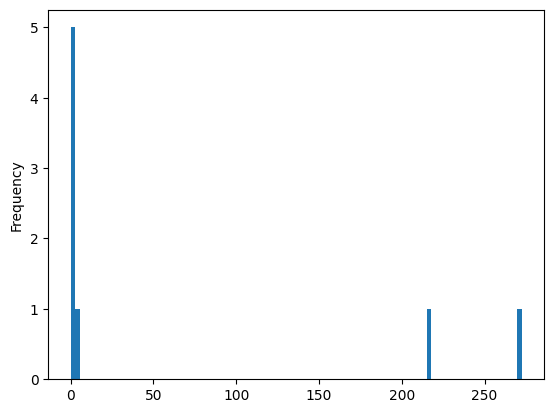

In [10]:
eval_set['pred_dist'].plot.hist(bins=100)

<Axes: ylabel='Frequency'>

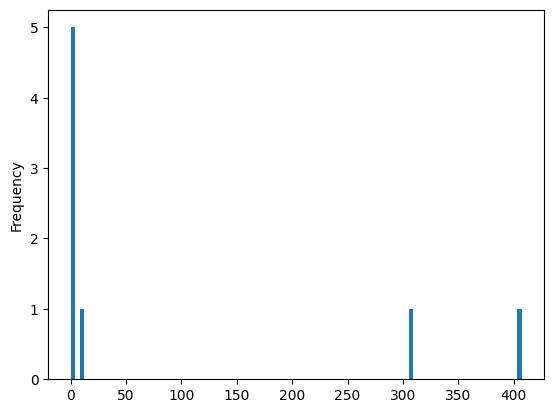

In [11]:
eval_set['geoclip_dist'].plot.hist(bins=100)

In [12]:
len(eval_set[eval_set['geoclip_dist'] < 1]), len(eval_set[eval_set['pred_dist'] < 1])

(4, 4)

In [13]:
eval_set['geoclip_pred_diff'] = eval_set.apply(lambda x: geod.Inverse(x['geoclip_lat'], x['geoclip_lon'], x['pred_lat'], x['pred_lon'])['s12']/1000, axis=1)
eval_set['geoclip_pred_diff']

/var/folders/z5/ks9fxjt91y1dgv38xzprh08m0000gn/T/ipykernel_12625/1345777795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eval_set['geoclip_pred_diff'] = eval_set.apply(lambda x: geod.Inverse(x['geoclip_lat'], x['geoclip_lon'], x['pred_lat'], x['pred_lon'])['s12']/1000, axis=1)


14       0.614838
43       0.000000
46       0.167271
75      40.304437
88     279.482039
126      7.604354
140      0.150635
144      0.000000
Name: geoclip_pred_diff, dtype: float64

In [14]:
eval_set['geoclip_pred_diff'].describe()

count      8.000000
mean      41.040447
std       97.334744
min        0.000000
25%        0.112976
50%        0.391055
75%       15.779375
max      279.482039
Name: geoclip_pred_diff, dtype: float64

<Axes: ylabel='Frequency'>

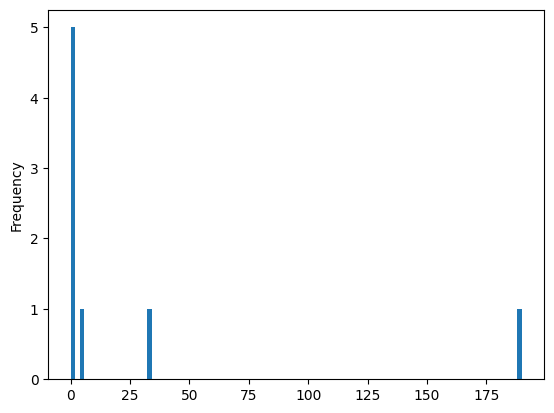

In [15]:
(eval_set['geoclip_dist'] - eval_set['pred_dist']).plot.hist(bins=100)

In [16]:
eval_set

,image,latitude,longitude,pred,pred_lat,pred_lon,geoclip_lat,geoclip_lon,geoclip_dist,pred_dist,geoclip_pred_diff
14,521324374_96290dd123_234_7132415@N03.jpg,45.516571,-122.674198,"45.5160, -122.6732",45.516000,-122.673200,45.516883,-122.680968,0.530109,0.100539,0.614838
43,323812702_56b1893e47_129_26519935@N00.jpg,22.255101,113.905992,"22.254024, 113.904983",22.254024,113.904983,22.254024,113.904983,0.158240,0.158240,0.000000
46,315248304_34cc3e6aea_103_49777280@N00.jpg,41.149383,-8.610105,"41.141979, -8.6117156",41.141979,-8.611716,41.140540,-8.612304,0.999275,0.833306,0.167271
75,1125007623_477d5426e9_1379_93455345@N00.jpg,37.331948,136.785278,"35.0344943, 135.71826339999998",35.034494,135.718263,34.685592,135.841140,305.719895,272.395431,40.304437
88,865326234_0c641c683c_1415_19953481@N00.jpg,49.779047,20.048675,"50.1684487, 23.0145855",50.168449,23.014585,52.647125,23.667554,407.023118,217.107139,279.482039
126,244563496_1439c608d0_90_40829484@N00.jpg,40.706018,-74.001760,"40.7131281, -74.0344231",40.713128,-74.034423,40.648703,-74.064910,8.307459,2.870854,7.604354
140,873010122_2c74adfa62_1015_9729483@N02.jpg,40.827461,-73.926744,"40.8296426, -73.9261745",40.829643,-73.926175,40.829238,-73.927879,0.219336,0.246985,0.150635
144,522503678_d890e18189_238_61819159@N00.jpg,-25.347283,131.055049,"-25.343715, 131.033678",-25.343715,131.033678,-25.343715,131.033678,2.187340,2.187340,0.000000
